# Constructing a SOM model for Financial Analysis

SOM (Self organizing map)

**Initialization**:

Determine the size and layout of the map (e.g., a M x N grid).
Initialize the weight vectors of all neurons randomly. Each neuron's weight vector will have the same dimensionality as the input data.

**Competition**:

For each input vector from the dataset:
Find the winning neuron (Best Matching Unit, BMU). This is the neuron whose weight vector is closest (usually in terms of Euclidean distance) to the current input vector.

**Cooperation**:

Once the BMU is found, determine its neighbors on the map. A topological neighborhood function is defined, often using a Gaussian function centered at the BMU. The extent (or radius) of this neighborhood typically starts large and decreases over iterations.

**Adaptation**:

Adjust the weights of the neurons in the neighborhood of the BMU. The weights are adjusted to move closer to the input vector. The BMU has the largest adjustment, and the adjustment decreases for neurons farther away from the BMU.

w(t+1)=w(t)+θ(t)∗α(t)∗(x(t)−w(t))
where:

w(t) is the weight vector of the neuron at iteration t

x(t) is the input vector at iteration t

α(t) is the learning rate at iteration t (usually decreasing over time)

θ(t) is the neighborhood function value at iteration t (determines the influence of an input on a neuron, based on its distance from the BMU)
Iterative Learning:

Repeat the competition, cooperation, and adaptation steps for several iterations. Each iteration usually involves presenting the entire dataset to the map, but there are variations.
Decay Learning Rate and Neighborhood Size:

As iterations progress, the learning rate and the neighborhood size are typically reduced. This allows the SOM to globally organize itself in the initial stages and fine-tune its organization in the later stages.
Evaluation (Optional):

Analyze and visualize the trained map to understand the patterns it has captured. One common technique is U-Matrix visualization, which displays the average distance between a neuron and its neighbors, helping in identifying clusters.


# Derived Information:
The analysis of investment behavior across different demographic clusters reveals several key insights. Firstly, there exists a diverse range of investment preferences among individuals, with some clusters favoring safer options like Fixed Deposits, indicating a conservative approach, while others show a higher inclination towards riskier assets such as Mutual Funds and Equity Market, suggesting a more aggressive investment strategy. Additionally, clusters with a more even distribution of investments across various options demonstrate a more diversified portfolio compared to those with concentrated investments in specific assets. Furthermore, age plays a significant role, with each cluster exhibiting a characteristic age range. Younger clusters tend to lean towards riskier investments, while older clusters show a preference for safer options. These findings highlight the importance of understanding demographic characteristics and investment preferences when developing tailored investment strategies.

Moving forward, it's essential to conduct further analysis to validate these insights and explore additional factors that may influence investment behavior, such as income levels, risk tolerance, and financial goals. Additionally, ongoing monitoring of market trends and economic conditions is crucial to adapt investment strategies accordingly. Concerns to keep in mind include the potential for bias in the dataset, sample representativeness, and the dynamic nature of financial markets. Ensuring data accuracy and integrity, as well as considering external factors like regulatory changes and geopolitical events, are paramount for making informed investment decisions. Collaboration with domain experts and continuous refinement of analytical models can enhance the robustness and reliability of the analysis, ultimately leading to more effective investment management strategies.

# Part 1 : Data Loading & Data Preprocessing

Financial Dataset:
The goal of the financial dataset is to cluster and identify relationships and general information.

In [1]:
import os
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:

data_path = "Data/data.csv"


# Ensure the request was successful
if not os.path.exists(data_path):
    # Write the response to a file
    with open(data_path, 'wb') as f:
        f.write(response.content)
else:
    print(f"Failed to retrieve data or file already exists.")

Failed to retrieve data or file already exists.


In [3]:
# load the data and do preprocessing

df = pd.read_csv(data_path).dropna()
df[:5]
features = df.iloc[:, 1:].values
    # Remove NAs
    # Convert to labels 
    # Feature selection 
    # Feature Extraction 
    
# Basic Exploratory Analysis 

# Construct a data loading like object 


In [4]:
df.shape

(40, 24)

In [5]:
df.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


In [6]:
df.nunique()

gender                                2
age                                  14
Investment_Avenues                    2
Mutual_Funds                          6
Equity_Market                         6
Debentures                            7
Government_Bonds                      7
Fixed_Deposits                        7
PPF                                   6
Gold                                  6
Stock_Marktet                         2
Factor                                3
Objective                             3
Purpose                               3
Duration                              4
Invest_Monitor                        3
Expect                                3
Avenue                                4
What are your savings objectives?     3
Reason_Equity                         3
Reason_Mutual                         3
Reason_Bonds                          3
Reason_FD                             3
Source                                4
dtype: int64

/Users/taylorlucero/anaconda3/envs/Thesis/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


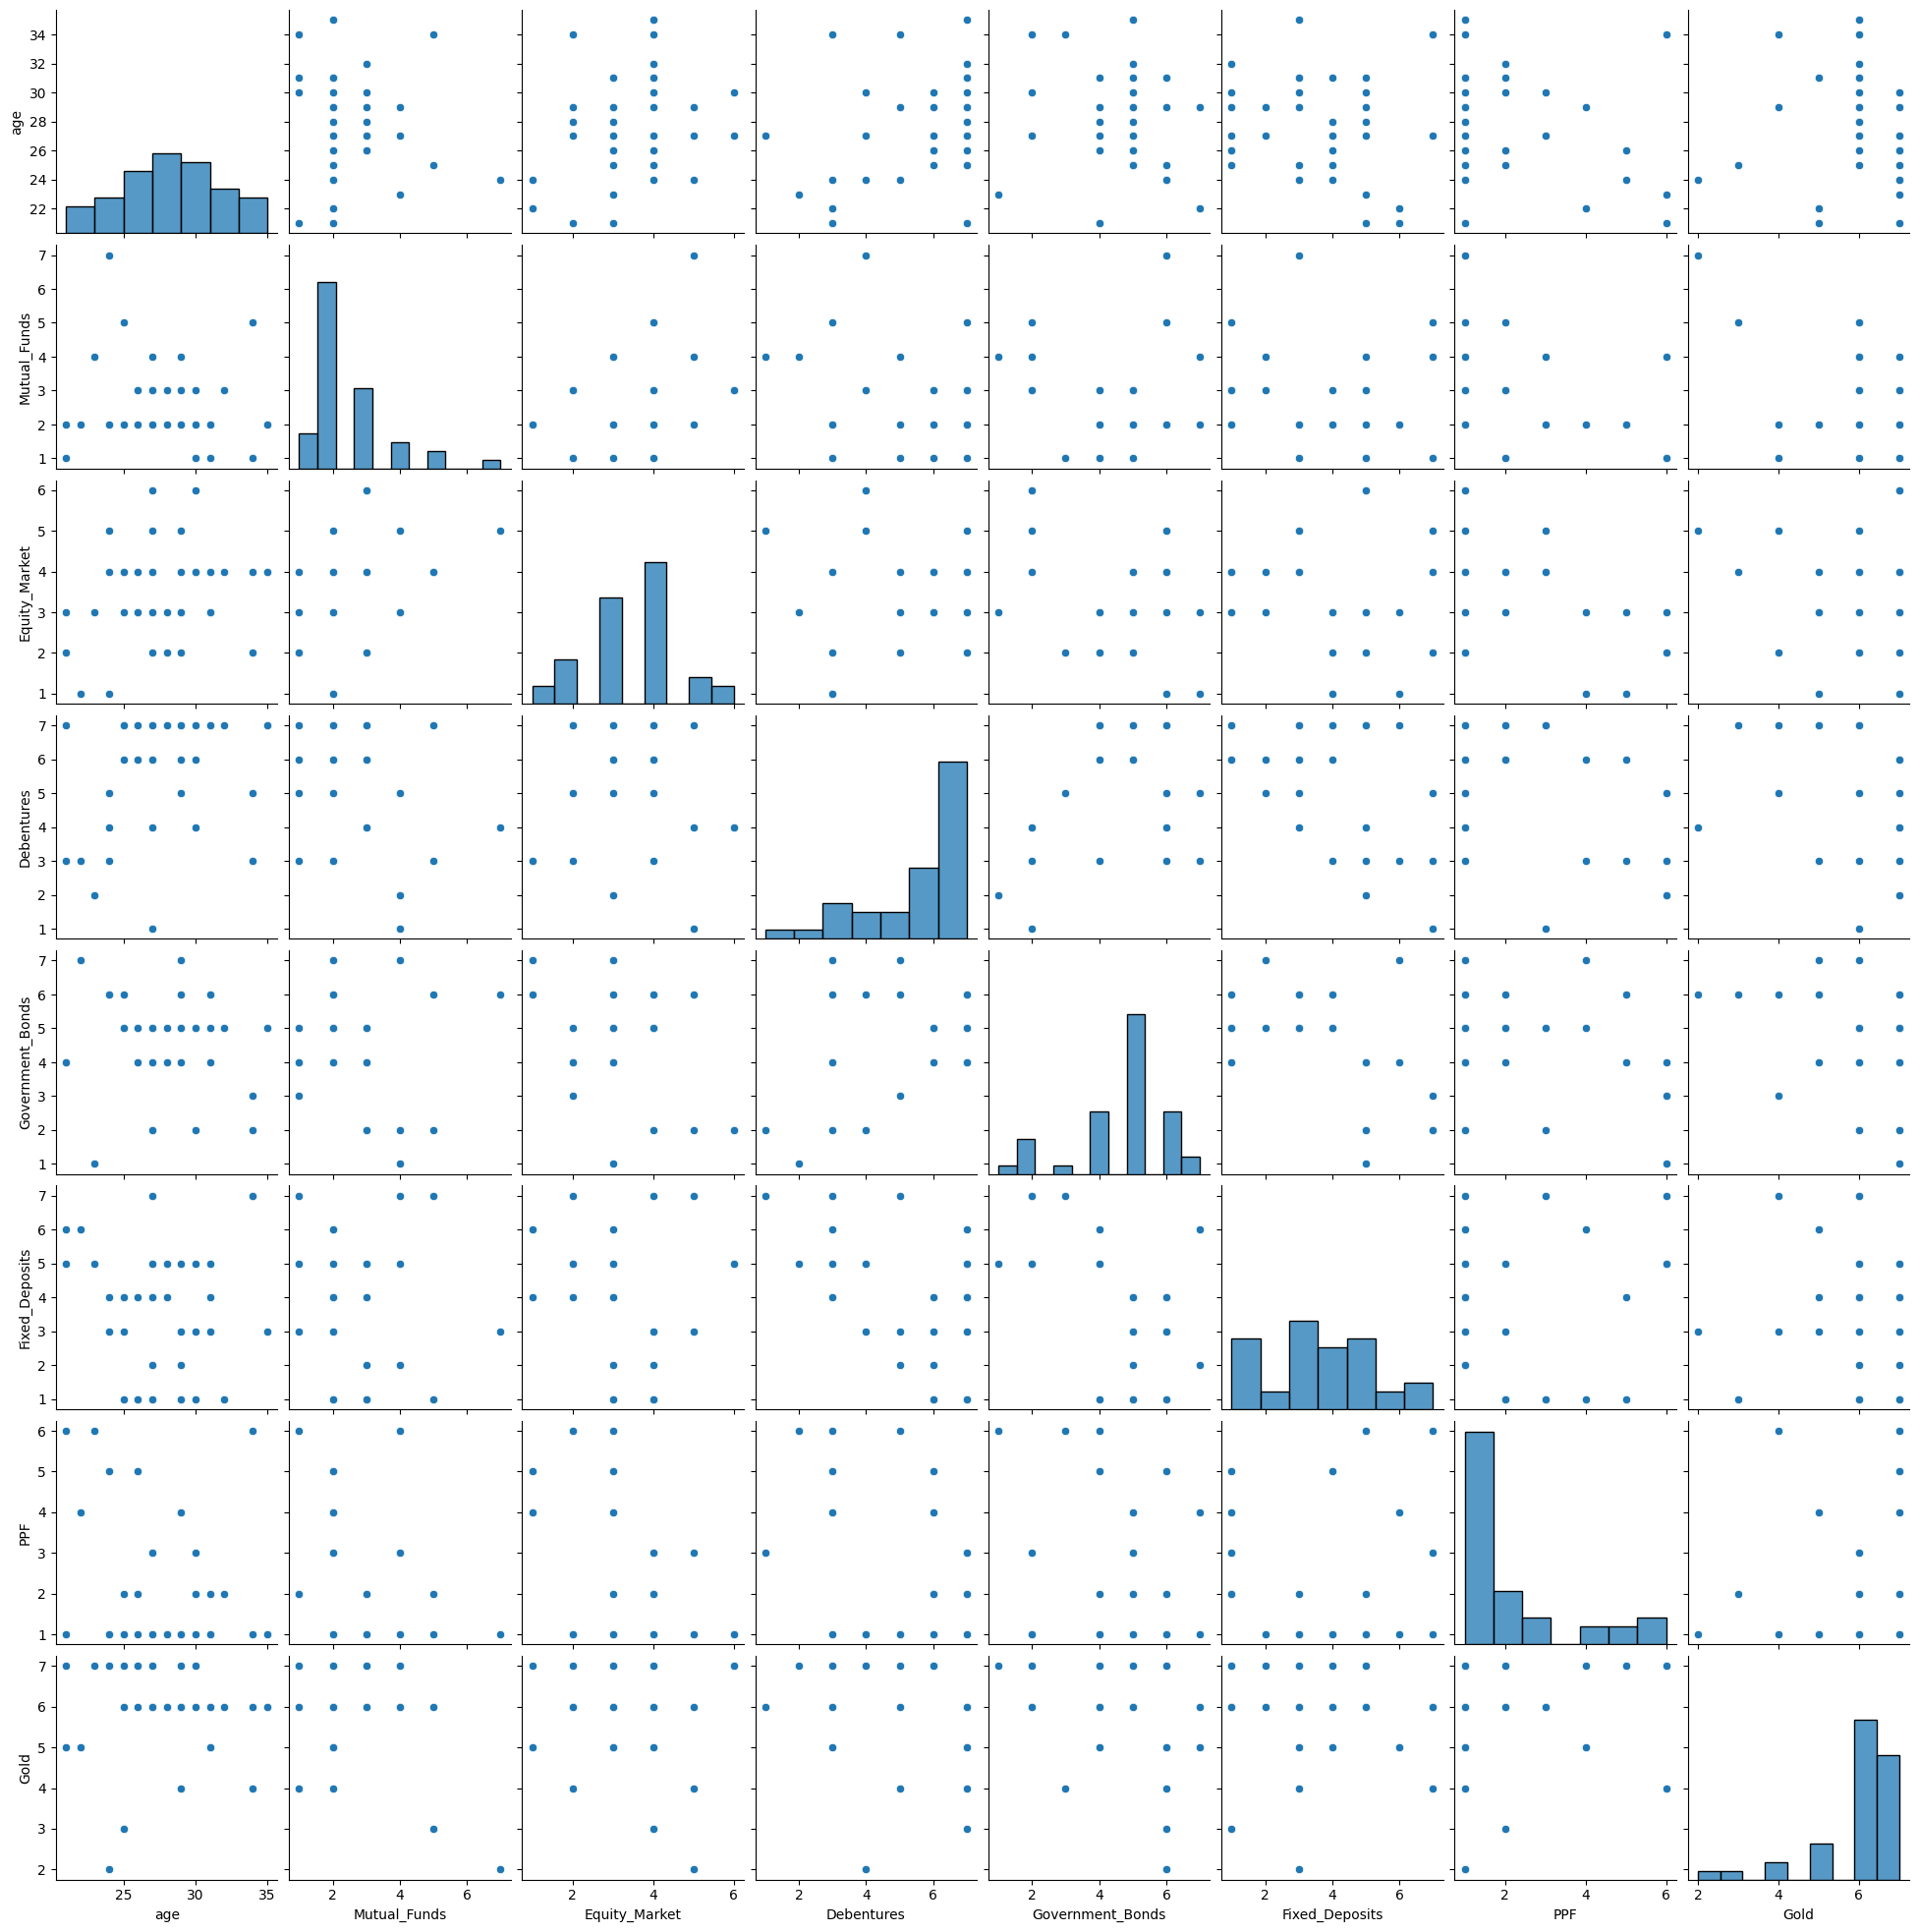

In [7]:

sns.pairplot(df)


<Axes: >

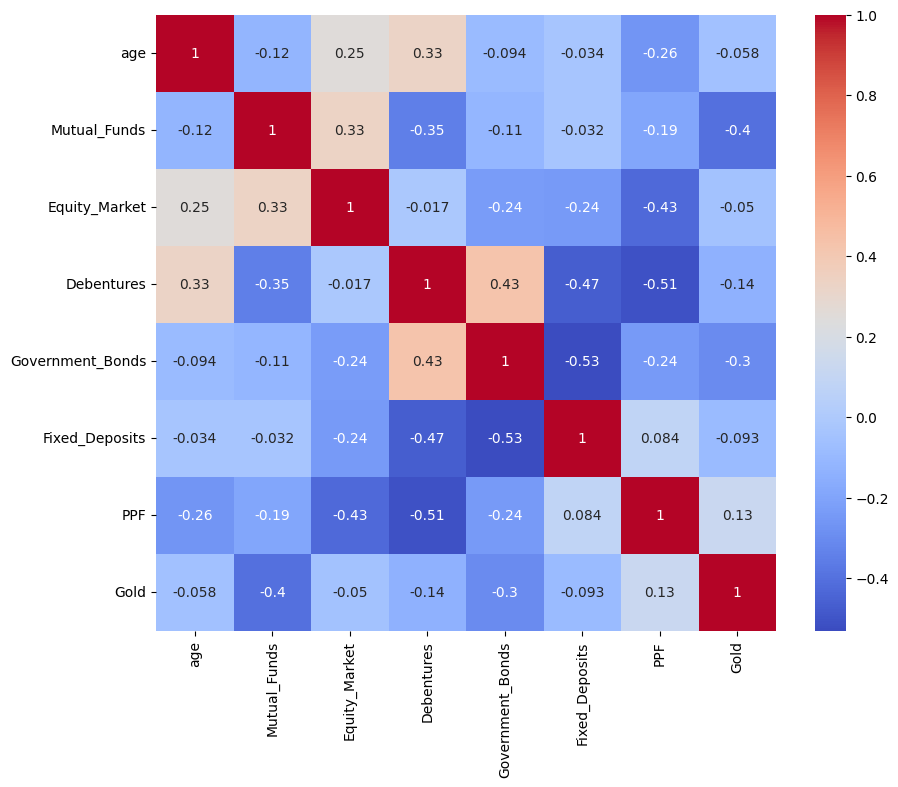

In [8]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [9]:


# Creating Age Bins of Two Years Each
max_age = df['age'].max()
bins = list(range(0, max_age + 2, 2))  # +2 to include the maximum age
df['Age_Group'] = pd.cut(df['age'], bins=bins)
print("\nCounts in Age Groups:\n", df['Age_Group'].value_counts())
print("\n Maximum Age:", df['age'].max())


Counts in Age Groups:
 (26, 28]    9
(28, 30]    8
(24, 26]    7
(30, 32]    5
(22, 24]    4
(20, 22]    3
(34, 36]    2
(32, 34]    2
(2, 4]      0
(0, 2]      0
(16, 18]    0
(14, 16]    0
(12, 14]    0
(10, 12]    0
(8, 10]     0
(6, 8]      0
(4, 6]      0
(18, 20]    0
Name: Age_Group, dtype: int64

 Maximum Age: 35


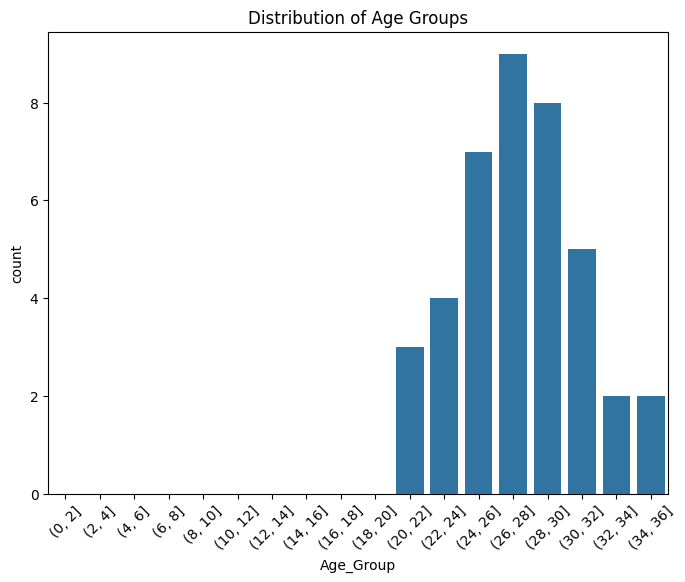

In [10]:
# Distribution of Age Groups
plt.figure(figsize=(8, 6))
sns.countplot(x='Age_Group', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Age Groups")
plt.show()

In [11]:

df['Age_Group'] = pd.cut(df['age'], bins=bins, right=False)
investment_cols = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']

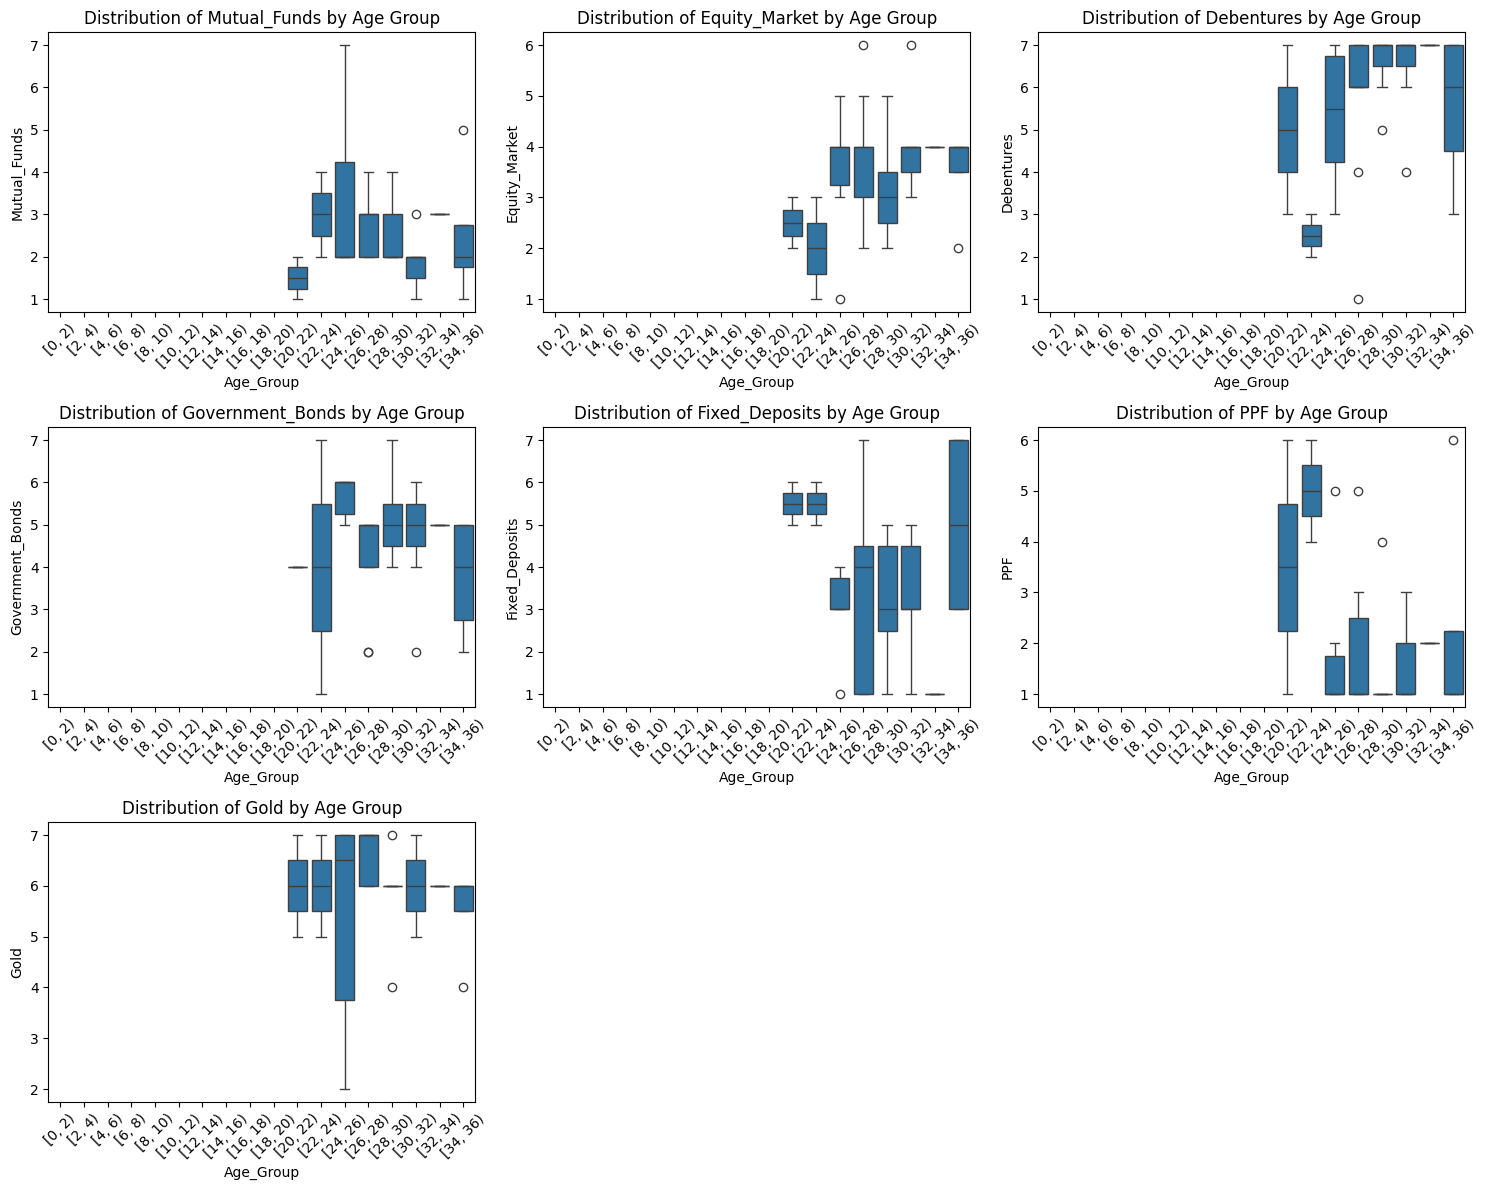

In [12]:
# Plotting distributions grouped by Age Group
plt.figure(figsize=(15, 12))
for i, col in enumerate(investment_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Age_Group', y=col, data=df)
    plt.title(f'Distribution of {col} by Age Group')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


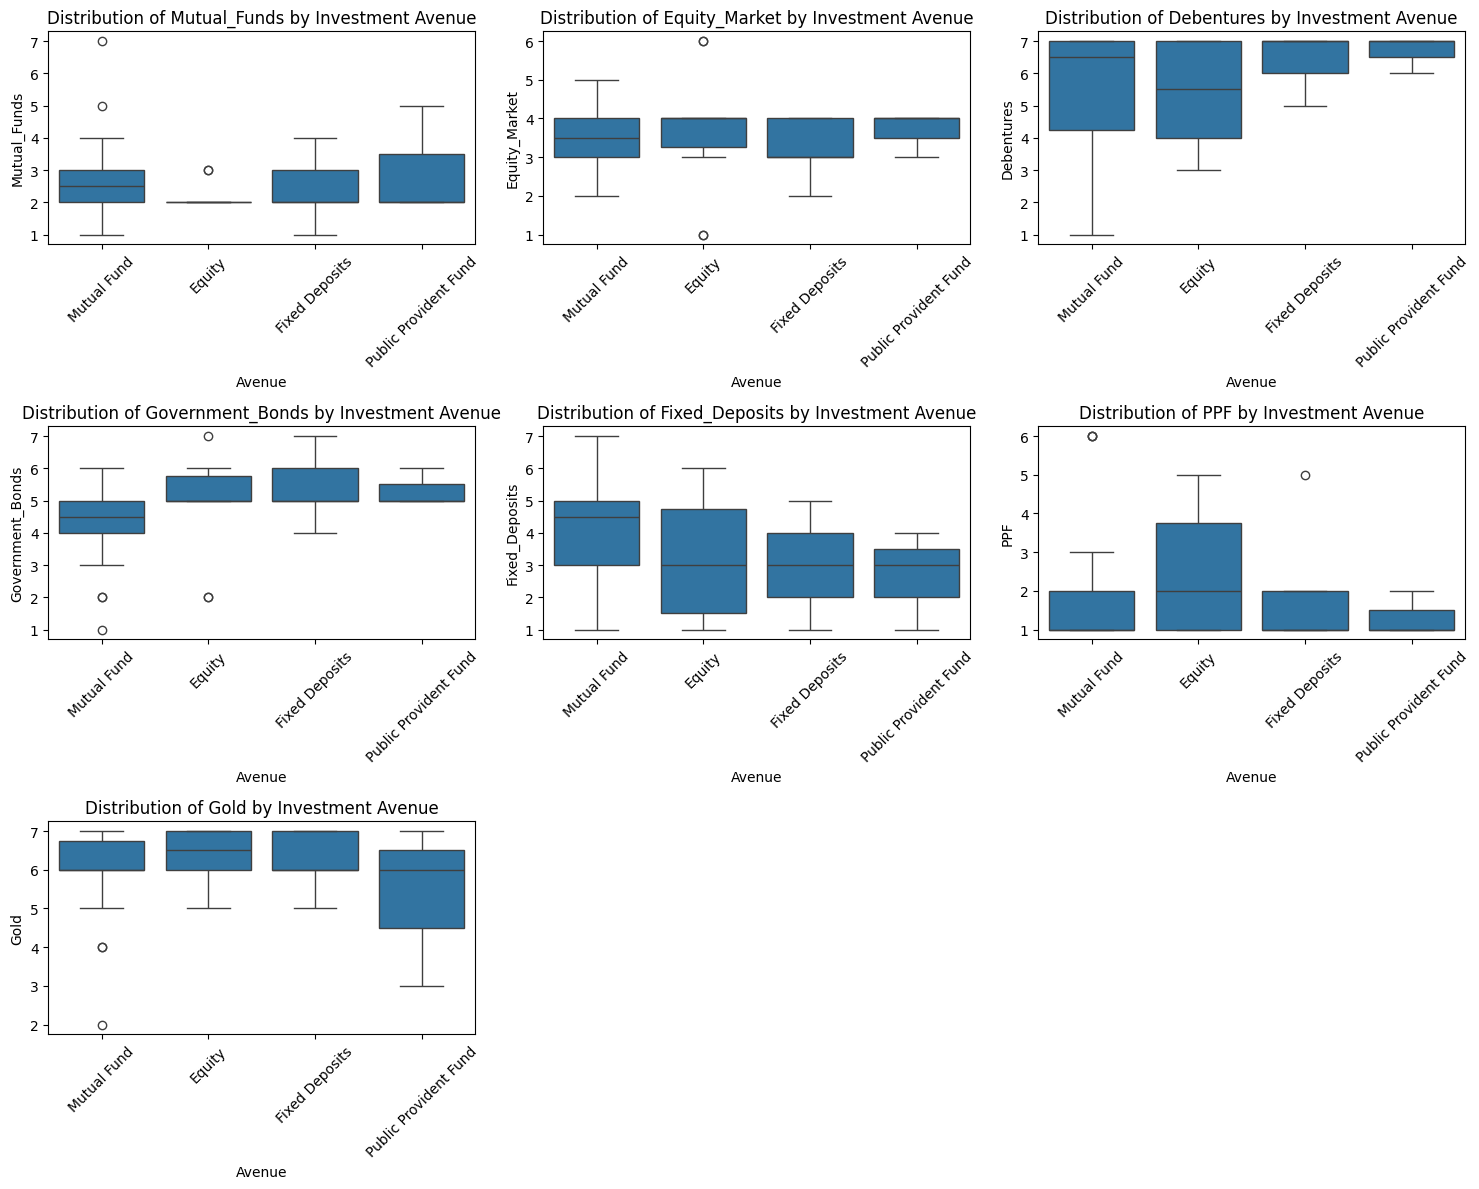

In [13]:
#Grouped by Avenue
plt.figure(figsize=(15, 12))
for i, col in enumerate(investment_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Avenue', y=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col} by Investment Avenue')
plt.tight_layout()
plt.show()

In [15]:
# Seperate the categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# consturct scaling and transformation of data 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)
        #('cat', OneHotEncoder(), categorical_cols)
    ])

#  apply the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data_np = np.array(pipeline.fit_transform(df))
data_np

array([[ 1.76352838, -1.3111603 , -1.31961005, -0.45329841, -1.22054909,
         1.9314942 ,  2.50184384, -1.74951825],
       [-1.3653123 ,  1.22656931, -0.42495917, -2.26649207, -2.70000253,
         0.80361438,  2.50184384,  0.90797783],
       [ 0.62576814,  0.38065944,  2.25899348, -1.0576963 , -1.96027581,
         0.80361438, -0.64512954,  0.90797783],
       [-1.64975236, -0.46525043, -2.21426093, -1.66209418,  1.7383578 ,
         1.36755429,  1.24305448, -0.86368623],
       [-1.08087224, -0.46525043, -2.21426093, -1.66209418,  0.99863107,
         0.23967446,  1.87244916,  0.90797783],
       [-1.08087224,  3.76429892,  1.36434259, -1.0576963 ,  0.99863107,
        -0.32426545, -0.64512954, -3.52118231],
       [-0.22755205,  0.38065944,  2.25899348, -1.0576963 , -1.96027581,
         0.80361438, -0.64512954,  0.90797783],
       [-1.93419242, -0.46525043, -0.42495917,  0.75549736, -0.48082237,
         1.36755429, -0.64512954, -0.86368623],
       [ 2.04796845, -0.46525043

# Part 2 : Model Construction 
##Steps

The steps of the model construction are as follows:
    
    1. Define the functions
        1.1 Define the loss function
        1.2 Define the optimizer
        1.3 Define the activation fun ction
        
    2. Define the model
        2.1 Define the input layer
        2.2 Define the hidden layers
        2.3 Define the output layer
        
    3. Define the training process
        3.1 Define the forward propagation and backward propagation
     
    

In [16]:

class SelfOrganizingMap:
    def __init__(self, dimensions, iterations, learning_rate, grid_size):
        self.dimensions = dimensions
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.grid_size = grid_size
        self.weights = np.random.rand(grid_size[0], grid_size[1], dimensions)

    def train(self, data):
        for i in range(self.iterations):
            # Decrease learning rate and neighborhood radius over time
            lr = self.learning_rate * (1 - i / self.iterations)
            for x in data:
                self.update_weights(x, lr)

    def update_weights(self, x, lr):
        bmu_idx = self.find_bmu(x)
        for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
                distance = np.linalg.norm(np.array([i, j]) - np.array(bmu_idx))  # Ensure bmu_idx is 2-dimensional
                for k in range(self.weights.shape[2]):
                    self.weights[i, j, k] += lr * np.exp(-distance**2 / (2 * (lr**2))) * (x[k] - self.weights[i, j, k])




    def find_bmu(self, x):
        bmu_idx = None
        min_dist = np.inf
        for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
                dist = np.linalg.norm(x - self.weights[i, j])
                if dist < min_dist:
                    min_dist = dist
                    bmu_idx = (i, j)
        return bmu_idx
    
    def topological_error(self, data):
    
        error_count = 0
        for x in data:
            # Find the first and second BMUs
            first_bmu, second_bmu = self.find_first_second_bmus(x)
            if not self.are_adjacent(first_bmu, second_bmu):
                error_count += 1
        return error_count / len(data)

    def find_first_second_bmus(self, x):
        first_bmu = None
        second_bmu = None
        min_dist = np.inf
        second_min_dist = np.inf
        for i in range(self.weights.shape[0]):
            for j in range(self.weights.shape[1]):
                dist = np.linalg.norm(x - self.weights[i, j])
                if dist < min_dist:
                    second_min_dist = min_dist
                    second_bmu = first_bmu
                    min_dist = dist
                    first_bmu = (i, j)
                elif dist < second_min_dist:
                    second_min_dist = dist
                    second_bmu = (i, j)
        return first_bmu, second_bmu

    def are_adjacent(self, idx1, idx2):
        # Check if two nodes are adjacent in the grid
        return np.linalg.norm(np.array(idx1) - np.array(idx2)) <= 1
    
    def calculate_umatrix(self):
        umatrix = np.zeros((self.grid_size[0], self.grid_size[1]))
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                neighbors = self.get_neighbors(i, j)
                neighbor_weights = self.weights[neighbors[:, 0], neighbors[:, 1]]
                umatrix[i, j] = np.mean(np.linalg.norm(self.weights[i, j] - neighbor_weights, axis=1))
        return umatrix

    def get_neighbors(self, i, j):
        neighbors = []
        for ni in range(max(0, i - 1), min(self.grid_size[0], i + 2)):
            for nj in range(max(0, j - 1), min(self.grid_size[1], j + 2)):
                if (ni != i or nj != j) and (ni >= 0 and nj >= 0):
                    neighbors.append([ni, nj])
        return np.array(neighbors)

    
    def get_component_planes(self):
        return [self.weights[:, :, i] for i in range(self.dimensions)]
    
    def plot_component_planes(self):
        component_planes = self.get_component_planes()
        num_planes = len(component_planes)
        fig, axes = plt.subplots(nrows=1, ncols=num_planes, figsize=(4*num_planes, 10))
        for i, plane in enumerate(component_planes):
            axes[i].imshow(plane, cmap='viridis', interpolation='nearest')
            axes[i].set_title(f'Component Plane {i+1}')
            axes[i].set_xticks([])
            axes[i].set_yticks([])
        plt.tight_layout()
        plt.show()

    def quantization_error(self, data):
            error = 0
            for x in data:
                bmu_idx = self.find_bmu(x)
                bmu = self.weights[bmu_idx[0], bmu_idx[1]]
                error += np.linalg.norm(x - bmu)
            return error / len(data)
        
    def consistency_check(self, data, num_runs=5):
        results = []
        for run in range(num_runs):
            # Reinitialize weights
            self.weights = np.random.rand(self.grid_size[0], self.grid_size[1], self.dimensions)
            self.train(data)
            qe = self.quantization_error(data)
            te = self.topological_error(data)
            weight_matrix = self.weights.copy()
            results.append({'run': run+1, 'qe': qe, 'te': te, 'weights': weight_matrix})
        return results
    
    def assign_clusters(self, data):
        cluster_labels = []
        for x in data:
            bmu_idx = self.find_bmu(x)
            cluster_labels.append(bmu_idx)  # For demonstration, just using BMU indices as cluster labels
        return cluster_labels

In [17]:
data_np.shape

(40, 8)

In [18]:
som = SelfOrganizingMap(dimensions=data_np.shape[1], iterations=1000, learning_rate=0.7, grid_size=(10, 10)) # Grid 10x10 = 100 neurons

som_results = som.consistency_check(data_np, num_runs=5) # Training occurs in the consistency check
for result in som_results:
    print(f"Run {result['run']}, QE: {result['qe']}, TE: {result['te']}")

Run 1, QE: 0.007111001549858652, TE: 0.175
Run 2, QE: 0.03555500774928722, TE: 0.125
Run 3, QE: 0.028444006199430216, TE: 0.125
Run 4, QE: 0.02844400619942993, TE: 0.05
Run 5, QE: 0.0426660092991442, TE: 0.15


In [19]:
#som_results[0]

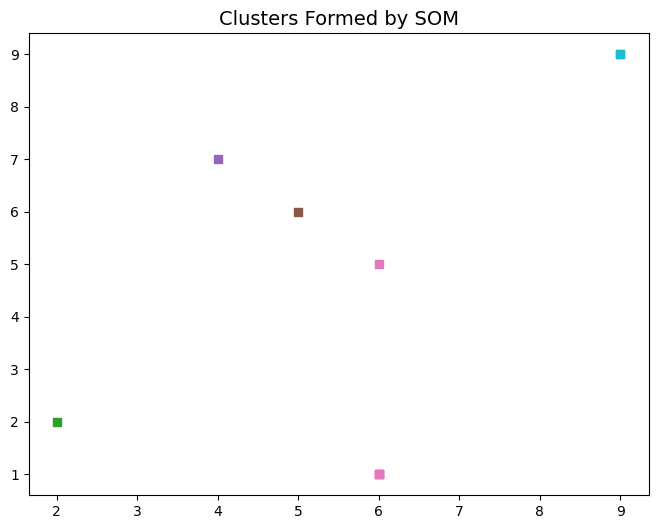

In [20]:
def plot_som_clusters(result, som, grid_size, dimensions):
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figsize as needed

    weights = result['weights']

    # Initialize arrays to store BMU indices
    bmu_indices = np.zeros((weights.shape[0], 2), dtype=int)

    # Find BMU indices for each weight vector
    for i in range(weights.shape[0]):
        bmu_indices[i] = som.find_bmu(weights[i])

    x = bmu_indices[:, 0]  # BMU indices along the x-axis
    y = bmu_indices[:, 1]  # BMU indices along the y-axis

    # Assign clusters to BMUs
    cluster_labels = som.assign_clusters(weights)

    # Plot each neuron with a color representing its cluster
    for i, (x_val, y_val) in enumerate(zip(x, y)):
        cluster_label = cluster_labels[i]
        cluster_color = plt.cm.tab10(cluster_label[0])  # Extract the color based on cluster label
        ax.scatter(x_val, y_val, c=[cluster_color], marker='s')  # Provide color as a 2D array

    ax.set_title("Clusters Formed by SOM", fontsize=14, loc='center')  # Title alignment and font size
    ax.title.set_position([0.5, 1.05])  # Title position adjustment
    plt.show()

# Call the function with the SOM result and SOM instance
plot_som_clusters(som_results[0], som, som.grid_size, som.dimensions)


In [21]:
cluster_labels = som.assign_clusters(data_np)
cluster_labels
#In (6, 9), 6 is the row index (y-coordinate), and 9 is the column index (x-coordinate).

[(3, 5),
 (4, 6),
 (0, 3),
 (7, 2),
 (6, 4),
 (9, 3),
 (1, 4),
 (8, 7),
 (0, 0),
 (9, 8),
 (0, 0),
 (9, 5),
 (5, 5),
 (9, 7),
 (7, 8),
 (8, 9),
 (7, 6),
 (6, 6),
 (6, 6),
 (2, 9),
 (2, 1),
 (6, 9),
 (0, 9),
 (5, 9),
 (7, 8),
 (4, 0),
 (2, 9),
 (7, 5),
 (1, 7),
 (5, 2),
 (3, 3),
 (8, 5),
 (4, 8),
 (3, 7),
 (6, 8),
 (5, 8),
 (4, 8),
 (9, 1),
 (1, 1),
 (7, 0)]

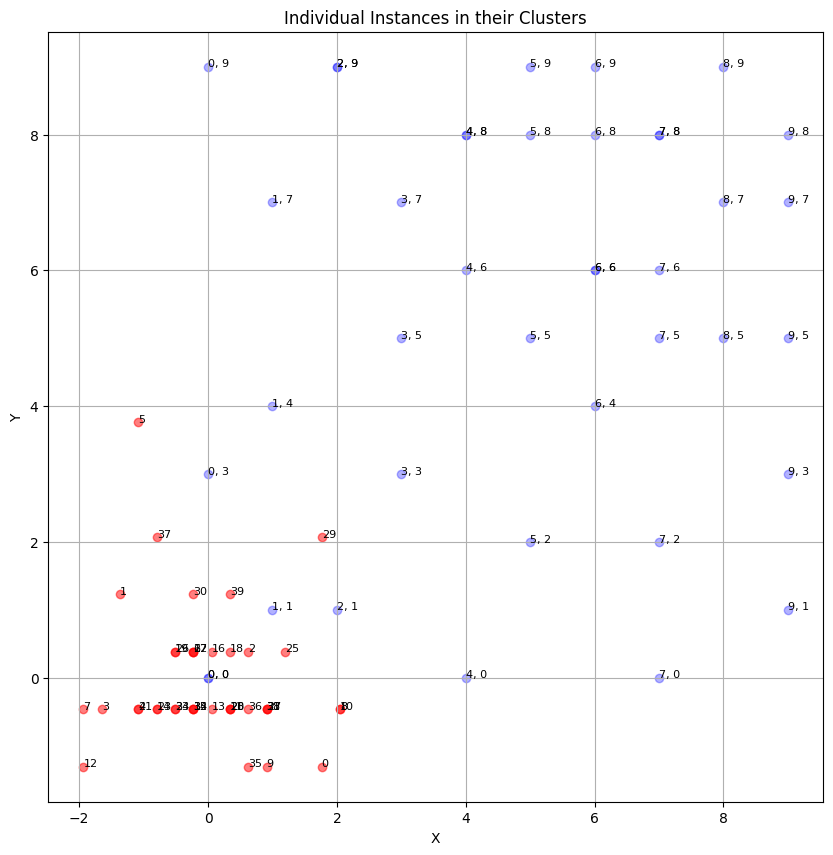

In [22]:


# Plot individual instances in their clusters
plt.figure(figsize=(10, 10))
for i, (x, label) in enumerate(zip(data_np, cluster_labels)):
    plt.scatter(label[0], label[1], c='b', alpha=0.3)  # Plot cluster center
    plt.text(label[0], label[1], f'{label[0]}, {label[1]}', fontsize=8)  # Label cluster center
    plt.scatter(x[0], x[1], c='r', alpha=0.5)  # Plot individual instance
    plt.text(x[0], x[1], f'{i}', fontsize=8)  # Label individual instance

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Individual Instances in their Clusters')
plt.grid(True)
plt.show()

# U-Matrix
The U-Matrix, short for Unified Distance Matrix, is a visualization technique commonly used in Self-Organizing Maps (SOMs) to represent the topological structure of the input data in the map. It provides insight into the relationships between different neurons (nodes) in the SOM grid by depicting the distances between neighboring neurons.

In a SOM, each neuron is associated with a weight vector, and during training, these weight vectors are adjusted to represent different patterns or features in the input data. The U-Matrix is calculated based on the distances between neighboring neurons' weight vectors.

Here's how the U-Matrix is calculated and visualized:

Calculating Distances: For each neuron in the SOM grid, the average distance to its neighboring neurons is computed. These distances can be calculated using various distance metrics, such as Euclidean distance, Manhattan distance, or cosine similarity.

Building the Matrix: The calculated distances are arranged into a grid structure, where each cell represents the average distance between a neuron and its neighbors. This forms the U-Matrix, which has the same dimensions as the SOM grid.

Visualization: The U-Matrix is then visualized as a heatmap or a pseudocolor plot, where different colors represent different distance values. Typically, low distance values (close neighbors) are shown in one color (e.g., blue), while high distance values (distant neighbors) are shown in another color (e.g., red).

The U-Matrix visualization provides several insights into the SOM:

Cluster Borders: Regions with high values in the U-Matrix indicate areas where neurons are farther apart, suggesting potential cluster boundaries or separations in the input data.

Smoothness of Clusters: Smooth, low-value regions in the U-Matrix correspond to areas where neighboring neurons represent similar input patterns. This indicates cohesive clusters in the data.

Topology Preservation: The U-Matrix helps visualize how well the SOM preserves the topological relationships between data points. A well-organized U-Matrix with smooth transitions between clusters indicates good topology preservation.

Essentially, the U-Matrix is like a map of this SOM. It shows the distances between the groups of flowers (which we call neurons) on the map.

Here's what the U-Matrix tells you:

Grouping Patterns: The U-Matrix helps you see how the different groups of flowers (neurons) are arranged on the map. It highlights areas where the groups are close together or far apart.

Finding Boundaries: Think of it like looking at a weather map where you can see temperature differences. In the U-Matrix, areas with high values (hot spots) show where the groups of flowers are far apart, like boundaries between different types of flowers.

Smoothness: If the map has smooth colors and transitions, it means the groups of flowers are organized neatly and are similar to each other. If it's jagged or patchy, it might mean the groups are not well organized.

Keeping Things in Order: The U-Matrix also helps you see if the map keeps things in order. For example, if similar flowers are next to each other on the map, it means the SOM did a good job of organizing them.

Low Values: Areas of the U-matrix with low values (usually depicted with darker colors) indicate regions where data points are densely clustered. This suggests that data points within these regions are similar to each other and may belong to the same group or category. Lower values can be considered "good" if the goal is to identify distinct clusters or patterns in the data.

High Values: Areas of the U-matrix with high values (usually depicted with lighter colors) indicate regions where data points are more spread out or separated. This suggests greater dissimilarity between data points within these regions. While higher values may not necessarily be "bad," they could indicate areas of the map where the SOM has identified transitions or boundaries between different clusters or categories in the data.

In summary, "good" scores for the U-matrix depend on the specific objectives of the analysis and the characteristics of the data. Lower values typically indicate denser clusters or cohesive regions, while higher values may indicate transitions or separations between clusters.


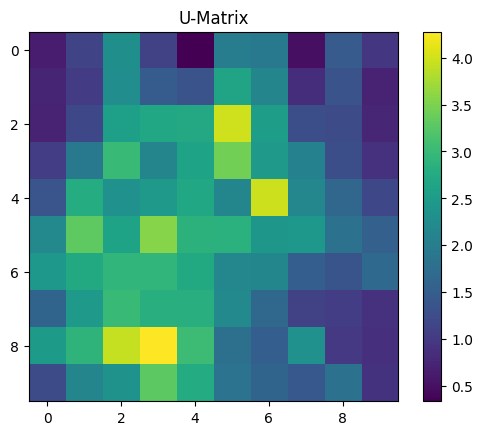

In [23]:
# Plot the U-Matrix
umatrix = som.calculate_umatrix()
plt.imshow(umatrix, cmap='viridis', interpolation='nearest')
plt.title('U-Matrix')
plt.colorbar()
plt.show()

# Component Planes

the component planes represent the weight vectors associated with each neuron in the map's grid. Each neuron in the SOM has a weight vector that captures its representation of the input space. These weight vectors are multidimensional, with each dimension corresponding to a feature or attribute of the input data.

The component planes visualization displays these weight vectors in a comprehensible format. Each component plane corresponds to one dimension of the input space. For example, if the input data has three features (dimensions), the SOM will have three component planes, each representing one feature.

Color Intensity: The intensity of color in each cell represents the magnitude or strength of the weight. Higher intensity or brighter colors typically indicate higher weights, while lower intensity or darker colors indicate lower weights.

Patterns and Clusters: By examining the component planes, you can identify patterns and clusters in the data. Neurons with similar weight vectors are grouped together in the SOM, and this grouping is reflected in the component planes. Regions of similar colors or intensity may indicate clusters or patterns in the input data.

Feature Importance: The component planes can also provide insights into the importance of different features in the data. Features with larger weight values in the component planes are considered more important by the SOM for representing the input data.

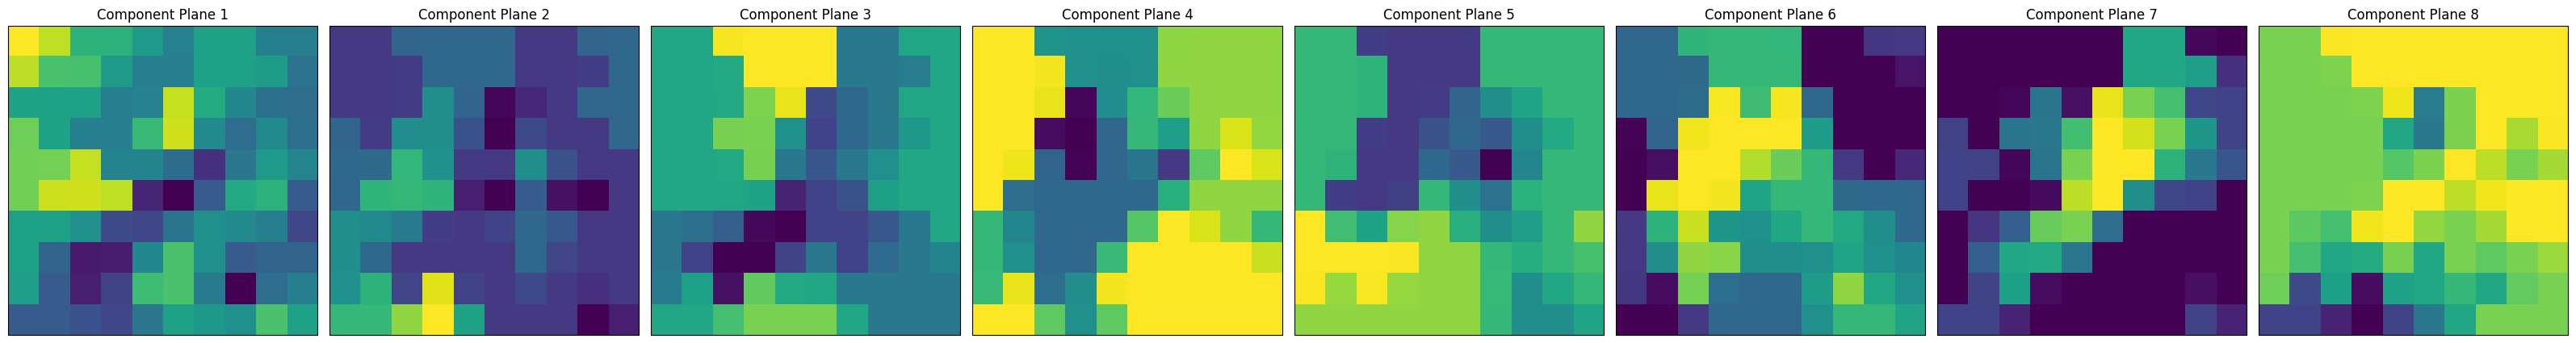

In [24]:
# Plot the component planes
som.plot_component_planes()

# Quantization Error 
The Quantization Error is the average distance between each data point and its Best Matching Unit (BMU) in the SOM.
It quantifies the average error (or dissimilarity) made when the SOM quantizes the input data, i.e., when it maps the high-dimensional input data onto the lower-dimensional grid.
Role as an Evaluation Metric:

A lower QE suggests that the SOM has done a better job at accurately mapping the input data onto the grid. It means that the neurons (nodes) of the SOM have weights that closely match the input data points.
In contrast, a higher QE indicates that the data points are, on average, farther from their BMUs, suggesting a poorer representation of the data on the SOM.
Interpreting QE:

While a low QE is generally desirable, it's also important to consider it in the context of the SOM's purpose. A very low QE might mean the map is overfitting to the input data, especially if the grid size is too large.
The QE should be balanced with other factors like the topographic error (which measures the preservation of data topology) and the interpretability of the SOM.
Use in Model Tuning:

QE can be used to tune the parameters of a SOM, such as grid size, learning rate, and the number of iterations. By evaluating how QE changes with different parameters, you can find a configuration that provides a good representation of your data.

Basically, QE value can give you an indication of how closely the SOM's neurons represent the input data

# Topological Error 

Topological Error (TE) is a measure used to evaluate the preservation of the topological relationships between data points in the input space and their representations on the Self-Organizing Map (SOM). It quantifies the extent to which the SOM preserves the neighborhood relationships of the input data.

Role as an Evaluation Metric:

TE provides insight into how well the SOM preserves the topology or the spatial relationships between data points. It measures the degree to which neighboring data points in the input space remain neighbors on the SOM grid.
A lower TE suggests that the SOM accurately preserves the topological relationships of the input data, indicating that neighboring data points in the input space remain close to each other on the SOM grid.
Conversely, a higher TE indicates that the topological relationships between data points are not well preserved on the SOM grid, suggesting a poorer representation of the data's structure.
Interpreting TE:

A low TE is desirable as it indicates that the SOM effectively captures the underlying structure of the data and preserves its topology.
However, it's important to interpret TE in conjunction with other evaluation metrics, such as Quantization Error (QE), to gain a comprehensive understanding of the SOM's performance.
Use in Model Tuning:

TE can be used to fine-tune the parameters of the SOM, such as grid size, learning rate, and number of iterations. By evaluating how TE changes with different parameter settings, you can optimize the SOM to better preserve the topological relationships of the input data.

In [25]:
# Quantization Error
qe = som.quantization_error(data_np)
te = som.topological_error(data_np)
qe, te

(0.0426660092991442, 0.15)

# Visualization of the SOM clusters

In [27]:
def plot_all_weight_matrices(som_results, grid_size, dimensions):
    num_runs = len(som_results)
    print("Number of runs:", num_runs)  # Debug print
    fig, axes = plt.subplots(1, num_runs, figsize=(num_runs * 5, 5))  # Adjust figsize as needed

    for i, result in enumerate(som_results):
        run_number = result['run']
        weights = result['weights']
        print(f"Run {run_number} - Weight Matrix Shape:", weights.shape)  # Debug print
        ax = axes[i]
        sns.heatmap(weights.reshape((grid_size[0], grid_size[1] * dimensions)), ax=ax, cmap='viridis')
        ax.set_title(f"Run {run_number}")

    plt.show()


In [31]:
# ADD Cluster assignments to the df 

# Convert cluster labels to DataFrame
cluster_labels_df = pd.DataFrame({'Cluster_Labels': cluster_labels})

# Concatenate cluster labels DataFrame with original DataFrame
df_with_clusters = pd.concat([df, cluster_labels_df], axis=1)


# General Profiles constructed from the clusters

Looking at the two charts below of the clusters, 
Age Distribution: Each cluster has a characteristic age range. For example, clusters (5, 5) and (8, 7) have relatively younger individuals with an average age of 21 and 21 respectively, while clusters (4, 6) and (7, 2) have older individuals with average ages of 23 and 22 respectively.

Investment Preferences: Looking at the values for different investment options such as Mutual Funds, Equity Market, Debentures, Government Bonds, Fixed Deposits, PPF, and Gold, we can discern the investment preferences of each cluster. For instance, clusters (5, 5) and (9, 3) have higher values for Fixed Deposits compared to other clusters, indicating a conservative investment approach. On the other hand, clusters (9, 1) and (9, 5) have higher values for Mutual Funds and Equity Market, suggesting a more aggressive investment strategy.

Diversification: Clusters with more evenly distributed values across various investment options indicate a more diversified investment portfolio. For example, cluster (3, 3) has relatively balanced values across different investment options compared to cluster (4, 6), which has more concentrated investments in Government Bonds and Fixed Deposits.

Risk Appetite: Clusters with higher values for riskier assets like Equity Market and Mutual Funds might indicate a higher risk appetite among individuals in those clusters. Conversely, clusters with higher allocations to safer investments like Government Bonds and Fixed Deposits may suggest a more risk-averse approach.

In [36]:
cluster_groups = df_with_clusters.groupby('Cluster_Labels')

cluster_archetypes_mean = cluster_groups.mean(numeric_only=True)
cluster_archetypes_median = cluster_groups.median(numeric_only=True).T

# Display the archetypes/profiles for each cluster
cluster_archetypes_mean

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
Cluster_Labels,,,,,,,,
"(0, 0)",35.0,2.0,4.0,7.0,5.0,3.0,1.0,6.0
"(0, 3)",30.0,3.0,6.0,4.0,2.0,5.0,1.0,7.0
"(0, 9)",27.0,3.0,4.0,6.0,5.0,2.0,1.0,7.0
"(1, 1)",31.0,2.0,4.0,7.0,5.0,3.0,1.0,6.0
"(1, 4)",27.0,3.0,6.0,4.0,2.0,5.0,1.0,7.0
"(1, 7)",29.0,2.0,3.0,6.0,5.0,1.0,4.0,7.0
"(2, 1)",29.0,2.0,4.0,7.0,5.0,3.0,1.0,6.0
"(2, 9)",26.0,3.0,4.0,6.0,5.0,1.0,2.0,7.0
"(3, 3)",27.0,4.0,5.0,1.0,2.0,7.0,3.0,6.0


In [34]:
cluster_archetypes_median

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
Cluster_Labels,,,,,,,,
"(0, 0)",35.0,2.0,4.0,7.0,5.0,3.0,1.0,6.0
"(0, 3)",30.0,3.0,6.0,4.0,2.0,5.0,1.0,7.0
"(0, 9)",27.0,3.0,4.0,6.0,5.0,2.0,1.0,7.0
"(1, 1)",31.0,2.0,4.0,7.0,5.0,3.0,1.0,6.0
"(1, 4)",27.0,3.0,6.0,4.0,2.0,5.0,1.0,7.0
"(1, 7)",29.0,2.0,3.0,6.0,5.0,1.0,4.0,7.0
"(2, 1)",29.0,2.0,4.0,7.0,5.0,3.0,1.0,6.0
"(2, 9)",26.0,3.0,4.0,6.0,5.0,1.0,2.0,7.0
"(3, 3)",27.0,4.0,5.0,1.0,2.0,7.0,3.0,6.0


In [43]:
df_with_clusters

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,Age_Group,Cluster_Labels
0,Female,34,Yes,1,2,5,3,7,6,4,...,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines,"[34, 36)","(3, 5)"
1,Female,23,Yes,4,3,2,1,5,6,7,...,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants,"[22, 24)","(4, 6)"
2,Male,30,Yes,3,6,4,2,5,1,7,...,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television,"[30, 32)","(0, 3)"
3,Male,22,Yes,2,1,3,7,6,4,5,...,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet,"[22, 24)","(7, 2)"
4,Female,24,No,2,1,3,6,4,5,7,...,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet,"[24, 26)","(6, 4)"
5,Female,24,No,7,5,4,6,3,1,2,...,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet,"[24, 26)","(9, 3)"
6,Female,27,Yes,3,6,4,2,5,1,7,...,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants,"[26, 28)","(1, 4)"
7,Male,21,Yes,2,3,7,4,6,1,5,...,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines,"[20, 22)","(8, 7)"
8,Male,35,Yes,2,4,7,5,3,1,6,...,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television,"[34, 36)","(0, 0)"
9,Male,31,Yes,1,3,7,4,5,2,6,...,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines,"[30, 32)","(9, 8)"


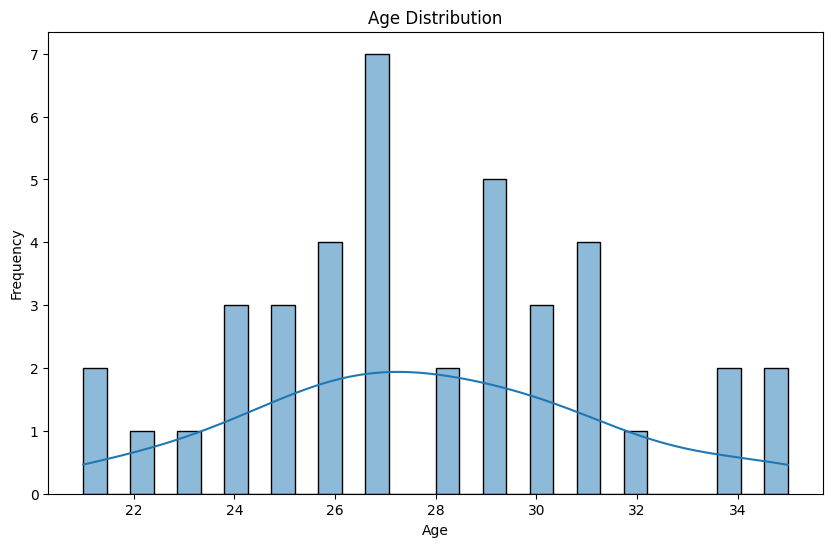

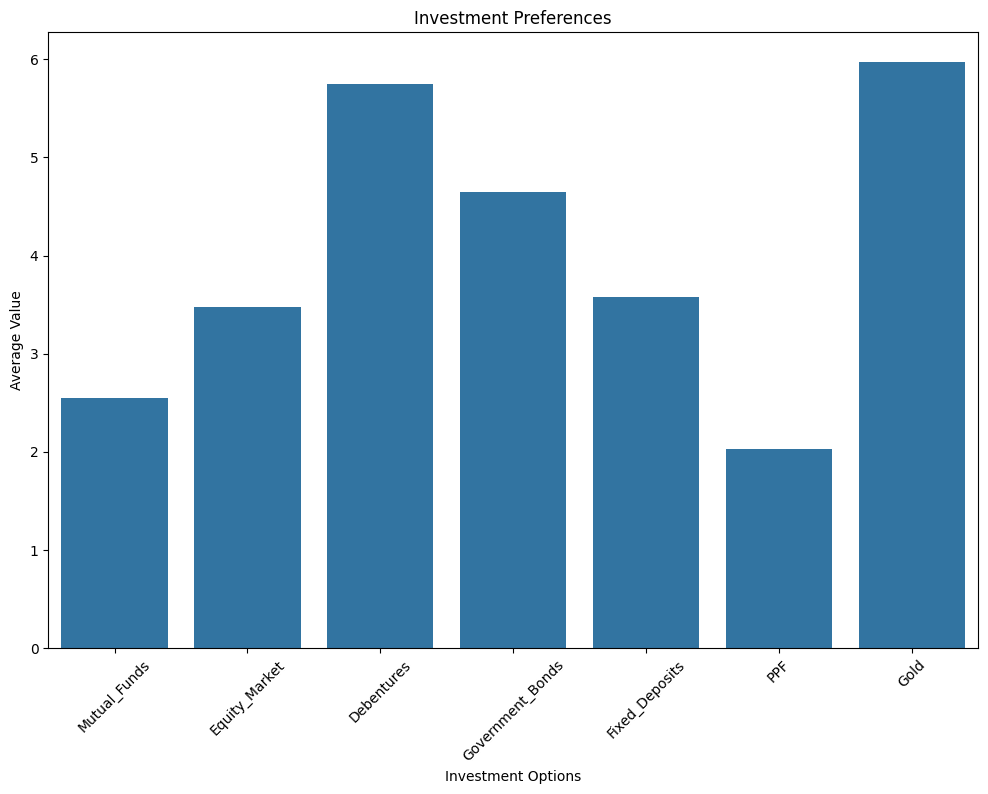

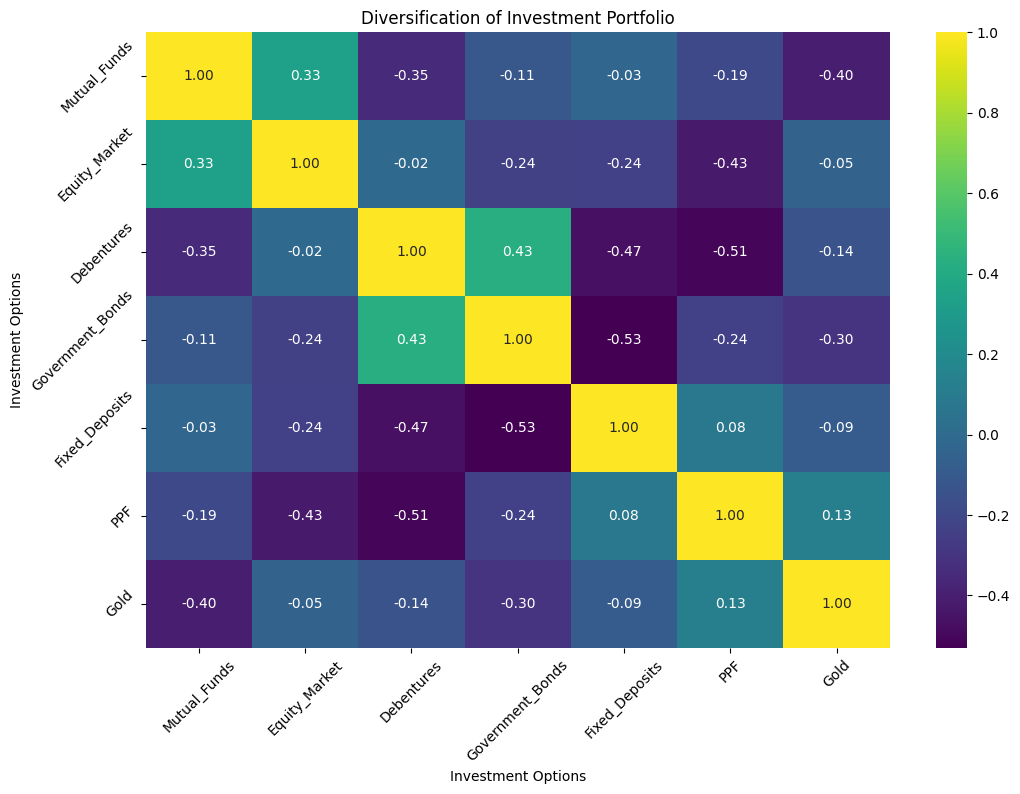

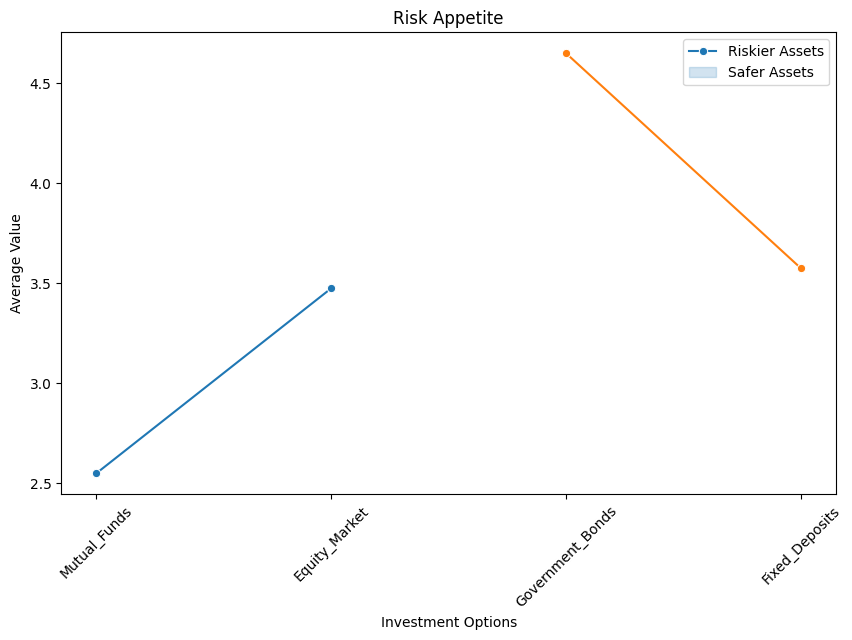

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_with_clusters_reset, x='age', bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


# Investment Preferences
investment_options = ['Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold']
plt.figure(figsize=(12, 8))
sns.barplot(data=df[investment_options].mean().reset_index(), x='index', y=0)
plt.xlabel('Investment Options')
plt.ylabel('Average Value')
plt.title('Investment Preferences')
plt.xticks(rotation=45)
plt.show()

# Diversification
plt.figure(figsize=(12, 8))
sns.heatmap(df[investment_options].corr(), cmap='viridis', annot=True, fmt='.2f')
plt.xlabel('Investment Options')
plt.ylabel('Investment Options')
plt.title('Diversification of Investment Portfolio')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


The above visuals show this information, 
that Gold and Debentures are the two most popular investment options, while PPF is the worst. 
there is a small correlation between Debentures and Governemtn bonds and mutual fund and equity markey while the other values are negatively correlated.
Age tends to follow a normal distribution as seen in the age distribution chart with most being around 25 - 26 years of age in the dataset. 

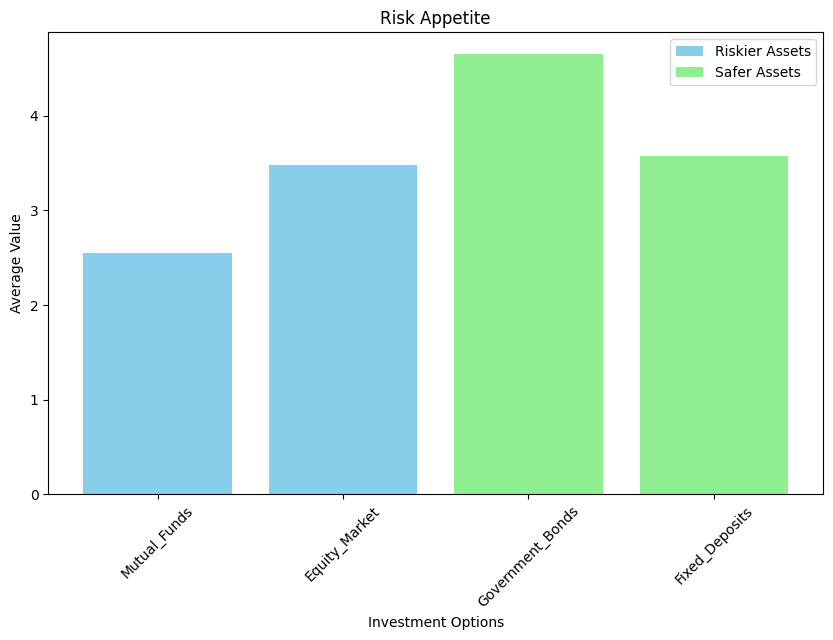

In [62]:
# Calculate average values for riskier and safer assets
riskier_avg = df[riskier_assets].mean()
safer_avg = df[safer_assets].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(riskier_assets, riskier_avg, color='skyblue', label='Riskier Assets')
plt.bar(safer_assets, safer_avg, color='lightgreen', label='Safer Assets')
plt.xlabel('Investment Options')
plt.ylabel('Average Value')
plt.title('Risk Appetite')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Between the riskier and safer options, the safer option tend to have a larger average value between the four. This makes sense as overtime safer assets could provide more stable assets compared to the riskier options. 

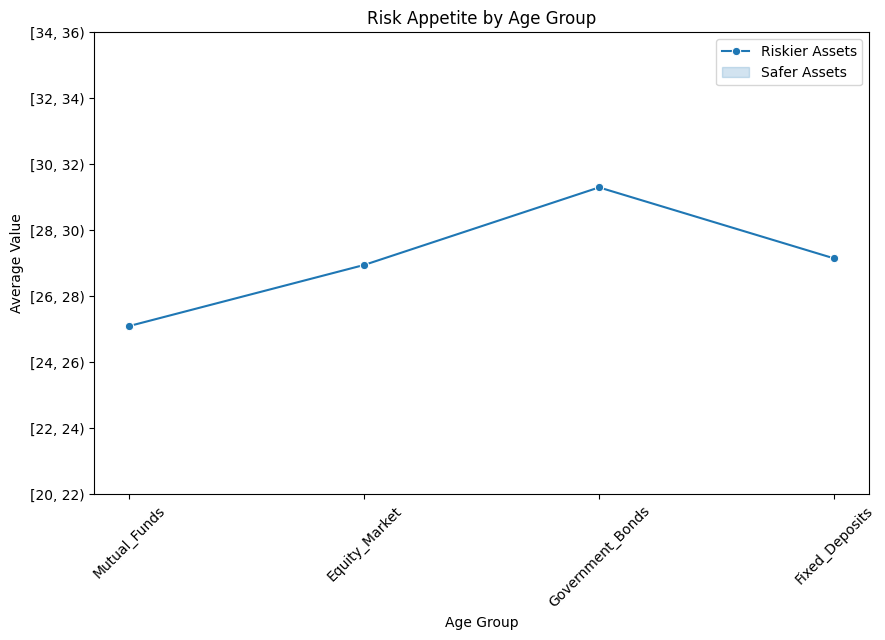

In [79]:
# Selecting only the numeric columns for riskier and safer assets
numeric_columns = riskier_assets + safer_assets

# Applying pd.to_numeric using transform
numeric_df = df.groupby('Age_Group')[numeric_columns].transform(lambda x: pd.to_numeric(x, errors='coerce'))

# Get unique age groups from the original DataFrame and sort them
age_groups = sorted(df['Age_Group'].unique())

# Risk Appetite by Age Group
plt.figure(figsize=(10, 6))
sns.lineplot(data=numeric_df.mean(), marker='o')
plt.xlabel('Age Group')
plt.ylabel('Average Value')
plt.title('Risk Appetite by Age Group')
plt.legend(['Riskier Assets', 'Safer Assets'])
plt.yticks(range(len(age_groups)), age_groups)  # Set y-axis labels to age groups
plt.xticks(rotation=45)
plt.show()


This shows that slightly older people are more prone to investing in safer assetts, but this is shown with a small difference betweeen the two. 
This could be do to more genrational influecnes or looking for more stability in an individuals life.

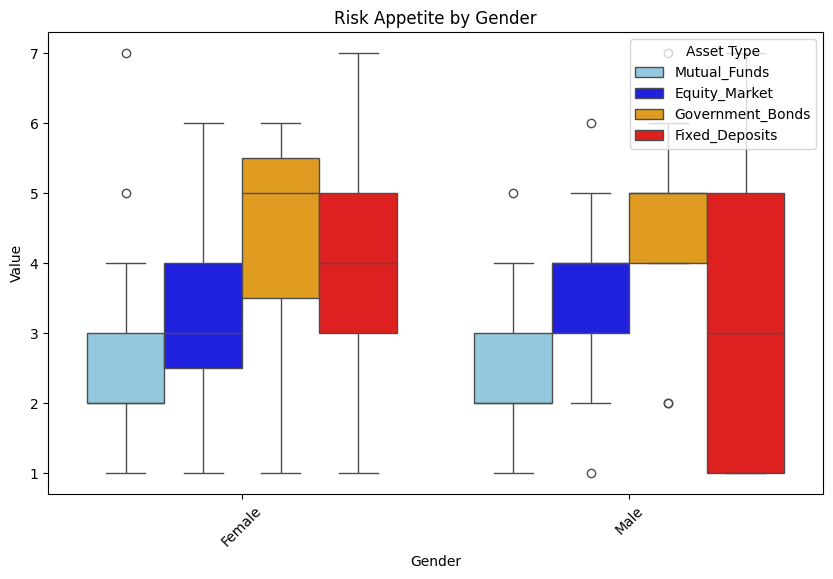

In [78]:


# Riskier and safer assets
riskier_assets = ['Mutual_Funds', 'Equity_Market']
safer_assets = ['Government_Bonds', 'Fixed_Deposits']

# Melt the DataFrame to reshape it into long format
melted_df = df.melt(id_vars=['gender'], value_vars=riskier_assets + safer_assets, 
                    var_name='Asset_Type', value_name='Value')

# Risk Appetite by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='gender', y='Value', hue='Asset_Type', palette=['skyblue', 'blue', 'orange', 'red'])
plt.xlabel('Gender')
plt.ylabel('Value')
plt.title('Risk Appetite by Gender')
plt.legend(title='Asset Type', loc='upper right')
plt.xticks(rotation=45)
plt.show()


Looks at the boxplots we can see that males tend to have similar amounts between the four asset types, where as females show a larger distibution between the four types, males show a smaller range between the assets except fixed deposits which has the highest range between the four. 
Thus :

Males are more likely to invest in fixed deposits than others while females tend to show a more even distribution between the fours.